### Haberman Dataset EDA

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


#load dataset
df = pd.read_csv("haberman.csv")

In [3]:
df.head(10)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


**Description of Columns** 



**Age** = Patient's age


**Year**=Operation Year

**Nodes**=Axillary nodes in breast

**Status**=1 pointed to the patient who survived 5 years or longer and 2 pointed to the patient died within 5 year





In [5]:
print(df.shape)

(306, 4)


306 Datapoints with 4 features

## Our Objective is to classify the patient survival status w.r.t Age,Year and Nodes

In [6]:
#(Q) What are the column names in our dataset?
print (df.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [7]:
#checking data is Balanced or Imbalanced
df["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

Proportion of 1 ans 2 have a big difference , So it is a *imbalanced* data

# **Univariate and Bi-variate analysis**

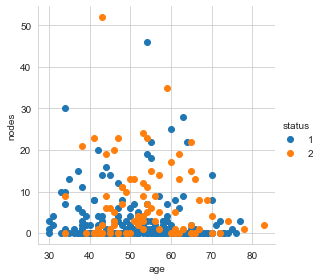

In [9]:
sns.set_style("whitegrid");
sns.FacetGrid(df, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.show();


###### we can't see any separation between patient's age and nodes 
Seperating Age from Nodes is much harder as they have considerable overlap.
As we know numbers of variables are small , we can use pair plots to check every plot between every variable 


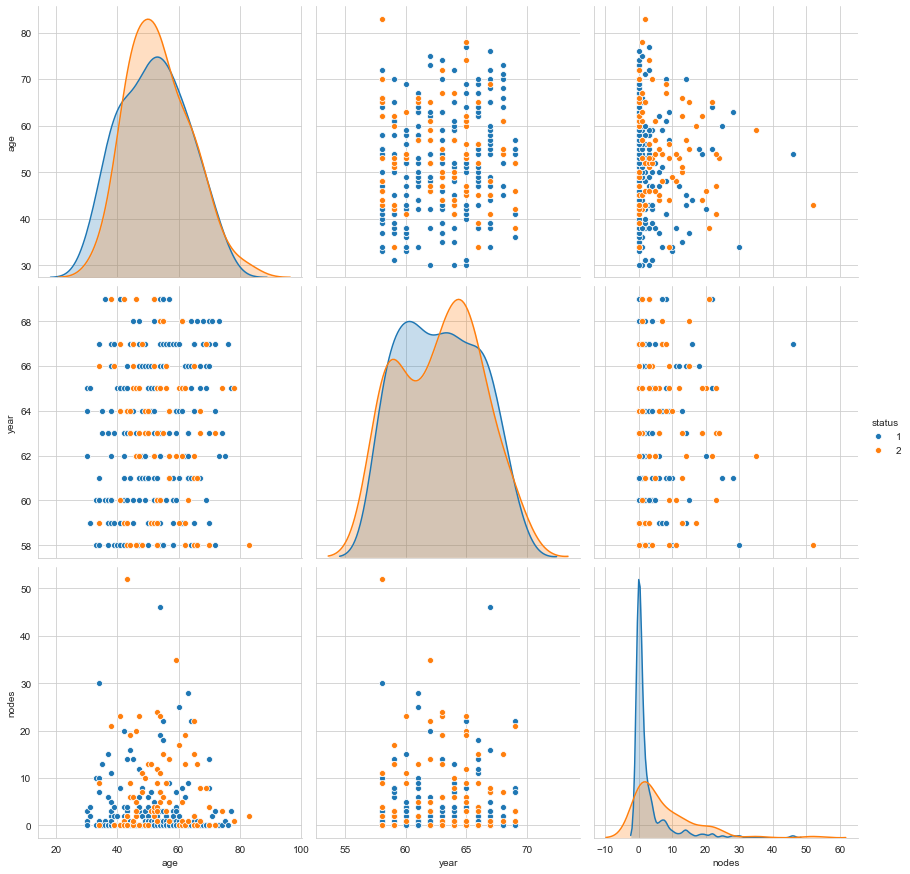

In [10]:
plt.close();
sns.pairplot(df,hue='status',height=4)
plt.show();

#### From Pairplot also we can not see much separation between variable and every varibale is overlapping with other

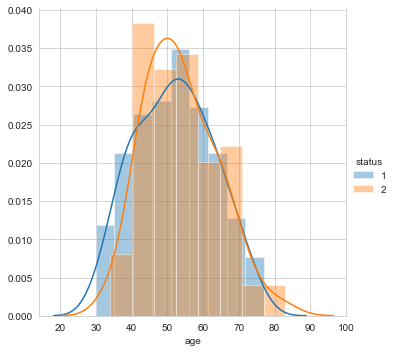

In [11]:
#histogram according to Age variable

sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();

* Age is not good variable for categorization because output of age variable histogram with status is too Dense.

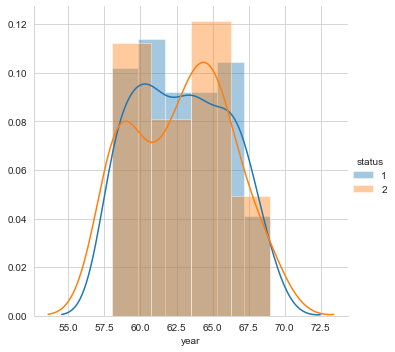

In [12]:
#histogram according to year variable

sns.FacetGrid(df, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();

* Year variable also doesn't explain too much same as age variable

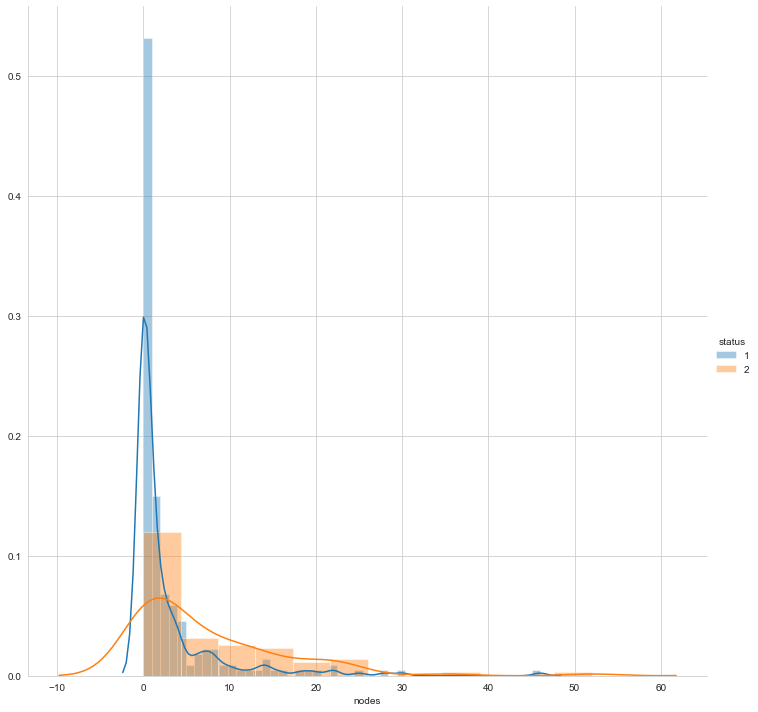

In [13]:
#histogram according to nodes

sns.FacetGrid(df, hue="status", height=10) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

Data is overlaped here also but we can see some changes here if we compare it to our previous variables
* Percentage of survival is high if number of nodes is less than 5 (we can see blue bar peek percentage is high till 5 nodes)





**CDF**

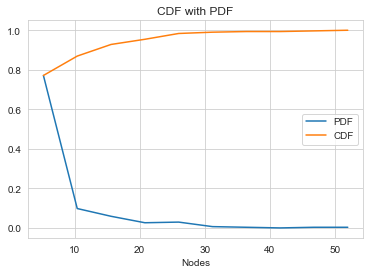

In [14]:
counts, bin_edges = np.histogram(df['nodes'], bins=10, density = True)
pdf = counts/(sum(counts))

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label='pdf');
plt.plot(bin_edges[1:], cdf, label='cdf')
plt.title('CDF with PDF')
plt.xlabel('Nodes')
plt.gca().legend(('PDF','CDF'));
plt.show();

Blue line is PDF and Red is CDF


Here we can see that patient has high chance of surviving if patient has less than 5 nodes , After 5 nodes surviving rate starts to decreasing



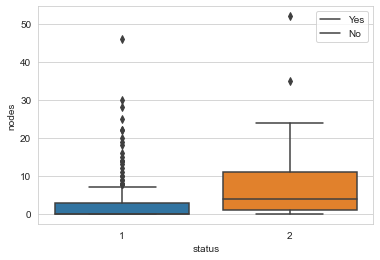

In [19]:
sns.boxplot(x='status',y='nodes', data=df)
plt.gca().legend(('Yes','No'))

plt.show()


In above Plot left whisker plot is for Pateint who survived more than 5 year after operation and has nodes less than 5 which we've also seen in histogram (CDF and PDF)

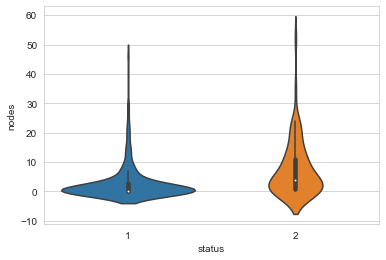

In [20]:
sns.violinplot(x="status", y="nodes", data=df, size=8)
plt.show()

Violin plot shows same conclusion as above

* we started our exploration of Haberman dataset with pairplots because number of variable were small,But couldn't see much spread and continued to Histograms
* In hisogram of every variable with 'Status' variable , Age and Year has too much overlapping But Nodes shows some different results of patient's Survival
* Then we used Boxplot for verification of Nodes histogram 


## CONCLUSION
* Among all variables 'nodes' variable is most useful
* Patients who have nodes more than 5 have high chance of death within 5 year of operation




Refrences :https://colab.research.google.com/drive/1Xgf90yMimLEt1eepb6yQp9fTE1ery_y0#scrollTo=g0mtgBgD7eVa

Towardsdatascience.com